<h3>Prediksi harga rumah berdasarkan dataset boston housing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h5>1. Data Loading

In [2]:
df = pd.read_csv('Pertemuan 4/boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<h5>2. Exploratory Data Analysis

In [3]:
#check feature
print('Total rows:', df.shape[0])
print('Total features:', df.shape[1])

Total rows: 506
Total features: 14


In [4]:
#check data type
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [5]:
# check missing value
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
#check duplicate data
df.duplicated().sum()

0

In [7]:
#Check statistics value
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<h5>Visualisasi Data

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

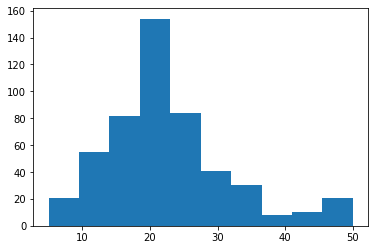

In [8]:
plt.hist(df['medv'])

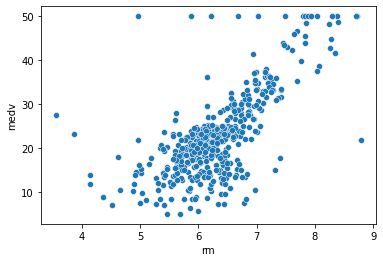

In [18]:
sns.scatterplot(data=df, x="rm", y="medv")
plt.show()

<h5>3. Data Preprocessing

In [56]:
df_boston =df.copy()
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Feature Selection

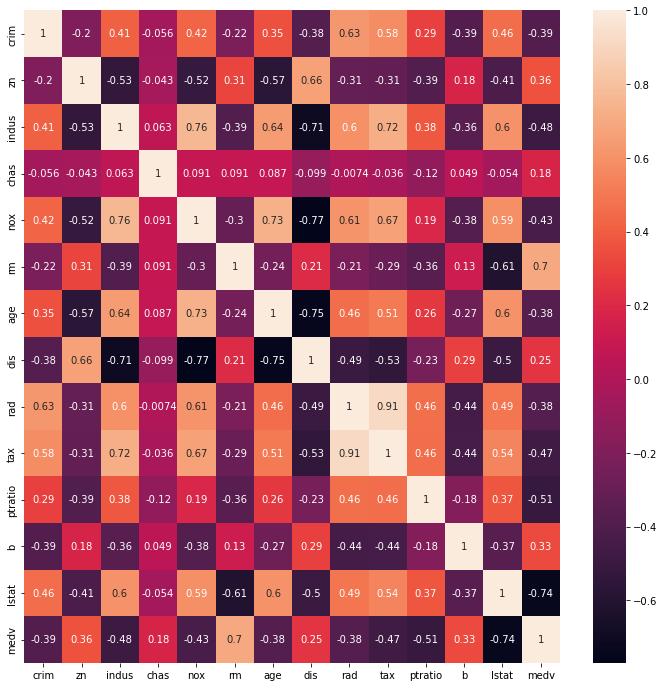

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(df_boston.corr(), annot=True)
plt.show()

In [60]:
cor_target = abs(df_boston.corr()['medv'])

relevant_features = cor_target[cor_target>0.5]
relevant_features

rm         0.695360
ptratio    0.507787
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

Drop Unused Feature

In [61]:
df_boston.drop(['crim','zn','nox','age','dis','b','chas','rad','tax','indus'], axis=1, inplace=True)
df_boston.head()

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


Handling Outlier

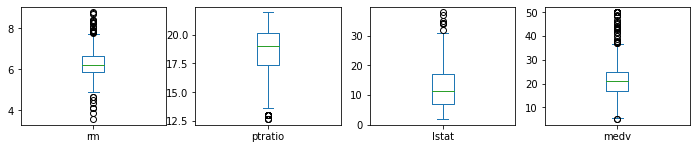

In [62]:
df_boston.plot(kind='box', subplots = True, layout = (4,4), figsize = (12,10))
plt.show()

In [63]:
# IQR Method
Q1 = df_boston.quantile(0.25)
Q3 = df_boston.quantile(0.75)
IQR = Q3-Q1
print(IQR)

rm          0.738
ptratio     2.800
lstat      10.005
medv        7.975
dtype: float64


In [64]:
df_boston_clear_iqr = df_boston[~((df_boston < (Q1-1.5*IQR)) | (df_boston > (Q3+1.5*IQR))).any(axis=1)]
df_boston_clear_iqr.shape[0]

443

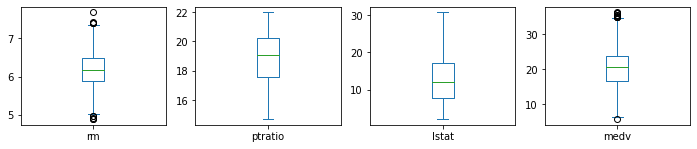

In [65]:
df_boston_clear_iqr.plot(kind='box', subplots = True, layout = (4,4), figsize = (12,10))
plt.show()

Handling Numerical Values (Min Max Scaler)


In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
mx = MinMaxScaler()

In [68]:
boston_scaled = df_boston_clear_iqr.copy()
print(boston_scaled)

        rm  ptratio  lstat  medv
0    6.575     15.3   4.98  24.0
1    6.421     17.8   9.14  21.6
2    7.185     17.8   4.03  34.7
3    6.998     18.7   2.94  33.4
4    7.147     18.7   5.33  36.2
..     ...      ...    ...   ...
501  6.593     21.0   9.67  22.4
502  6.120     21.0   9.08  20.6
503  6.976     21.0   5.64  23.9
504  6.794     21.0   6.48  22.0
505  6.030     21.0   7.88  11.9

[443 rows x 4 columns]


In [69]:
boston_scaled['rm'] = mx.fit_transform(boston_scaled[['rm']])
boston_scaled['ptratio'] = mx.fit_transform(boston_scaled[['ptratio']])
boston_scaled['lstat'] = mx.fit_transform(boston_scaled[['lstat']])
boston_scaled['medv'] = mx.fit_transform(boston_scaled[['medv']])

boston_scaled

,rm,ptratio,lstat,medv
0,0.602988,0.082192,0.104058,0.597403
1,0.548203,0.424658,0.248352,0.519481
2,0.819993,0.424658,0.071106,0.944805
3,0.753469,0.547945,0.033299,0.902597
4,0.806475,0.547945,0.116198,0.993506
...,...,...,...,...
501,0.609392,0.863014,0.266736,0.545455
502,0.441124,0.863014,0.246271,0.487013
503,0.745642,0.863014,0.126951,0.594156
504,0.680896,0.863014,0.156087,0.532468


Split Data

In [70]:
X=boston_scaled.drop(columns=['medv'])
y=boston_scaled['medv'].values

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [73]:
X_test

,rm,ptratio,lstat
290,0.704731,0.616438,0.046826
192,0.817503,0.068493,0.030871
206,0.514408,0.534247,0.311828
31,0.424048,0.863014,0.383628
244,0.253646,0.602740,0.364898
...,...,...,...
316,0.367841,0.506849,0.567118
239,0.614016,0.260274,0.186958
347,0.581999,0.438356,0.151925
331,0.293846,0.301370,0.362470


<h5>4. Data Modelling

Train Model

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Test Model

In [76]:
from sklearn.metrics import r2_score

In [80]:
accuracy_score = lr_model.score(X_train, y_train)
print(f'Accuracy : {accuracy_score * 100:.2f}%')

Accuracy : 70.71%


In [79]:
medv_pred = lr_model.predict(X_test)
medv_pred

array([0.7119367 , 0.84755024, 0.53904204, 0.41955602, 0.42961113,
       0.64305046, 0.38494698, 0.43868852, 0.74772103, 0.71567648,
       0.74099163, 0.59651493, 0.30839812, 0.42738201, 0.65849832,
       0.44922177, 0.38321015, 0.6457016 , 0.33488814, 0.52945498,
       0.57375349, 0.38667791, 0.45906814, 0.64937206, 0.45940271,
       0.5030365 , 0.46636128, 0.64579924, 0.37706681, 0.38262851,
       0.35518429, 0.50158447, 0.5739963 , 0.66153792, 0.50318214,
       0.63796275, 0.38799948, 0.58209713, 0.37094133, 0.70878847,
       0.63480155, 0.49594818, 0.34348551, 0.56823159, 0.59707625,
       0.45026253, 0.44372874, 0.77082918, 0.73177959, 0.56013496,
       0.60043336, 0.39216237, 0.42104858, 0.43724735, 0.4907133 ,
       0.54022597, 0.49930104, 0.48959196, 0.39135932, 0.60571849,
       0.55445704, 0.53199236, 0.37958415, 0.3622316 , 0.41444022,
       0.36068727, 0.56557089, 0.42497241, 0.3606316 , 0.57000313,
       0.45243951, 0.18772292, 0.67553436, 0.3599834 , 0.77397

In [49]:
y_test

array([0.74350649, 1.        , 0.61038961, 0.28896104, 0.38961039,
       0.66883117, 0.34090909, 0.35064935, 0.96103896, 0.99350649,
       0.8961039 , 0.46103896, 0.32467532, 0.47077922, 0.75974026,
       0.56818182, 0.28896104, 0.76298701, 0.05194805, 0.54545455,
       0.57142857, 0.12987013, 0.53896104, 0.75      , 0.44155844,
       0.77922078, 0.41883117, 0.55194805, 0.31818182, 0.38636364,
       0.37337662, 0.44805195, 0.49025974, 0.68181818, 0.50649351,
       0.59415584, 0.35714286, 0.52272727, 0.3961039 , 0.58116883,
       0.53246753, 0.5       , 0.56818182, 0.99350649, 0.59090909,
       0.57142857, 0.47077922, 0.62337662, 0.79545455, 0.56818182,
       0.53896104, 0.44805195, 0.44480519, 0.47727273, 0.34090909,
       0.53246753, 0.55194805, 0.43506494, 0.27597403, 0.55194805,
       0.44480519, 0.48376623, 0.49350649, 0.23051948, 0.48701299,
       0.29220779, 0.56168831, 0.17207792, 0.5487013 , 0.59090909,
       0.49025974, 0.05194805, 0.87337662, 0.24025974, 0.84740

In [86]:
print('Coefficient :', lr_model.coef_[0])
print('Intercept :', lr_model.intercept_)

Coefficient : 0.2683455008081795
Intercept : 0.6562082656200187


Evaluasi

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menampilkan MAE dan MSE
print('Mean Absolute Error (MAE): %.2f' % mean_absolute_error(medv_pred, y_test))
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(medv_pred, y_test))

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02


<h4>Kesimpulan :</h4>

Dari proses modelling yang dilakukan untuk memprediksi harga rumah dari data boston dengan menggunakan feature rm, ptratio, lstat didapat akurasi sebesar  70% dengan ukuran keakuratan error sebesar 2% (MAE) dan 9% (MSE) dimana hal ini menunjukan prediksi yang cukup baik untuk digunakan.